# 5. 모델평가
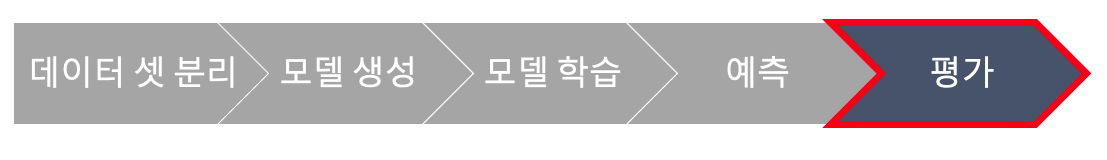

- 모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
- sckit-learn 평가 함수는 sklearn.metrics 모듈을 통해 제공한다. 
- 분류와 회귀에 따라 평가 방법이 다르다. 
- 분류 평가 지표 : 맞췄니/안맞췄니 나눠서 결과
    1. 정확도 (Accuracy)
    1. 정밀도 (Precision)
    1. 재현률/민감도 (Recall)
    1. F1점수 (F1 Score)
    1. PR Curve, AP
    1. ROC, AUC


- 회귀 평가 지표 : 실수값으로 결과가 나오며 오차범위 
    1. MSE (Mean Squared Error)
    1. RMSE (Root Mean Squared Error)
    1. $R^2$ (결정계수)




오늘은 분류의 평가 지표에 대해 알아보자. 

## 5.1 분류(Classsification) 평가 기준
- 양성(Positive) : 찾으려는(예측하는) 대상
- 음성(Negative) : 예측 대상이 아닌 것
|예시|양성(Positive)|음성(Negative)|
|--|--|--|
|암환자 분류|암환자|정상인|
|스팸메일 분류|스팸메일|정상메일|
|금융사기 모델|사기거래|정상거래|
    
### 5.1.1 균형데이터



In [1]:
### 5.1.2 불균형데이터 
## 5.2 혼동행렬
### 5.2.1 

## 5.2 정확도 (Accuracy)
$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- accuracy_score(모델예측값, 정답)
- 문제점 
    - 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

### 5.2.1 연습 MNIST
- 손글씨 데이터 셋
- 사이킷런 제공 image size: 8 X 8 
- [MNIST 위키](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)

(1797, 64) (1797,)


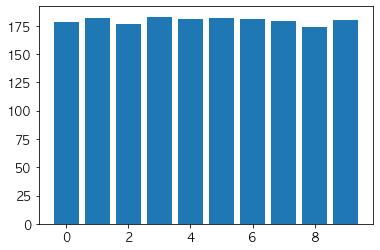

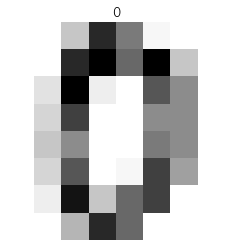

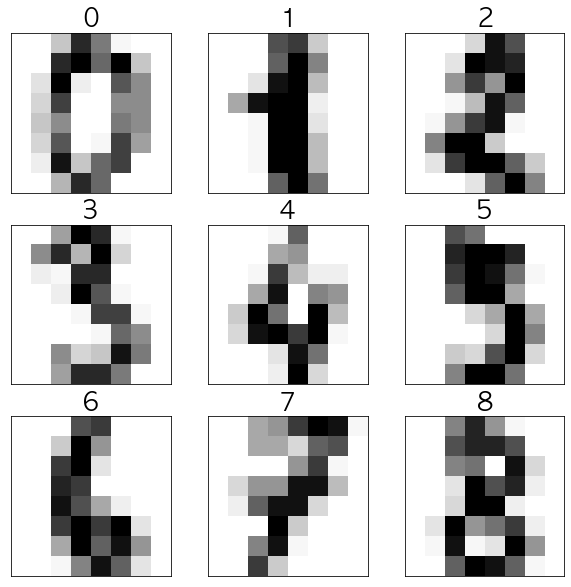

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# data 
digits = load_digits()
X, y = digits['data'], digits['target']
print(X.shape, y.shape) 
cnt = np.unique(y, return_counts = True) # 0 ~ 9 각각의 갯수 저장

# 막대그래프로 표현해보기
plt.bar(cnt[0], cnt[1])
plt.show()

#  각 축의 의미 확인
# X : 손글씨 숫자 이미지 , X.shape 
# X.shape : (1797, 64) --> (갯수, 이미지구성)
# 숫자 0에 대해 확인해보자 
no0 = X[0].reshape(8,8) # 64 = 8*8 
no0

plt.imshow(no0, cmap='Greys')
plt.axis('off') # 축 없애기 
plt.title(y[0])
plt.show()

# 0 - 8까지 표현해보자 
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X[i].reshape(8,8), cmap='Greys') #0 ~ 8
#     plt.axis('off')
    plt.xticks([])
    plt.yticks([])
    plt.title(y[i], fontdict={'fontsize':25})

plt.show()

@ 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

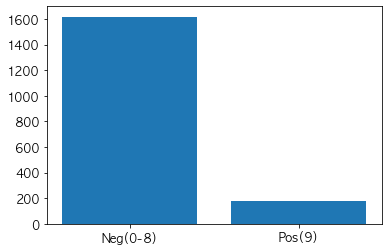

- train 전체 중에 False, True의 비율: [0.89977728 0.10022272]
- test  전체 중에 Fasle, True의 비율: [0.9 0.1]


In [48]:
# 불균형 데이터 셋으로 만들기 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# data 
digits = load_digits()
X, y = digits['data'], digits['target']
y = y == 9 # 9니? 9는 True(1), 나머지는 False(0) 
cnt2 = np.unique(y, return_counts = True)

# 그래프 그려보기
plt.bar(cnt2[0], cnt2[1])
plt.xticks([0,1], labels = ['Neg(0-8)','Pos(9)'])
plt.show()

# 훈련, 데스트 데이터셋 분할 
X_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y)
print('- train 전체 중에 False, True의 비율:',np.unique(y_train, return_counts = True)[1]/y_train.size)
print('- test  전체 중에 Fasle, True의 비율:',np.unique(y_test, return_counts = True)[1]/y_test.size)

# 모델 생성 

- 9아니야 라고 예측하게 되면 -> 90% 맞는건데, 과연 잘 맞는 모델인건가? 아니다. 
- 불균형 데이터의 문제점을 확인하는 과정이다. 